# Here are python codes for analysis and insights are provided at the end

In [6]:
import pandas as pd
data = pd.read_excel(r"C:\Users\ARYA DINESH\Downloads\Global-Superstore.xlsx")
print(data)

       Row ID         Order ID Order Date  Ship Date       Ship Mode  \
0       32298   CA-2012-124891 2012-07-31 2012-07-31        Same Day   
1       26341    IN-2013-77878 2013-02-05 2013-02-07    Second Class   
2       25330    IN-2013-71249 2013-10-17 2013-10-18     First Class   
3       13524  ES-2013-1579342 2013-01-28 2013-01-30     First Class   
4       47221     SG-2013-4320 2013-11-05 2013-11-06        Same Day   
...       ...              ...        ...        ...             ...   
51285   29002    IN-2014-62366 2014-06-19 2014-06-19        Same Day   
51286   35398   US-2014-102288 2014-06-20 2014-06-24  Standard Class   
51287   40470   US-2013-155768 2013-12-02 2013-12-02        Same Day   
51288    9596   MX-2012-140767 2012-02-18 2012-02-22  Standard Class   
51289    6147   MX-2012-134460 2012-05-22 2012-05-26    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Check for any missing values and data types
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

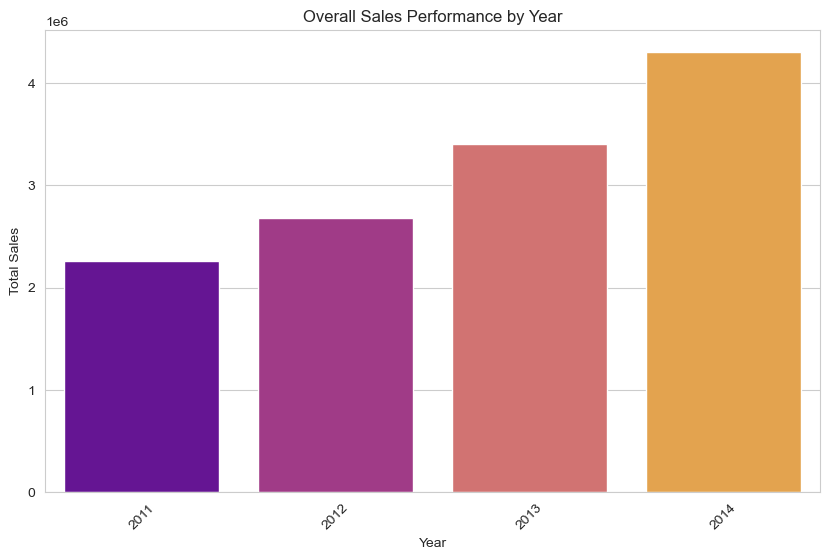

In [42]:
# Convert Order Date to datetime format and extract year and month 
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

# Overall Sales Performance by Year
sales_by_year = data.groupby('Order Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_year, x='Order Year', y='Sales', palette='plasma')
plt.title('Overall Sales Performance by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Grouping sales by region and market
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()
sales_by_market = data.groupby('Market')['Sales'].sum().reset_index()

Text(0.5, 1.0, 'Sales Distribution by Region')

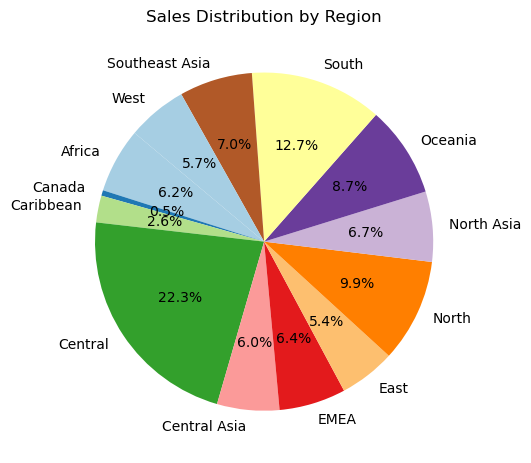

In [12]:
# Pie chart for sales by region
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sales_by_region['Sales'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Region')

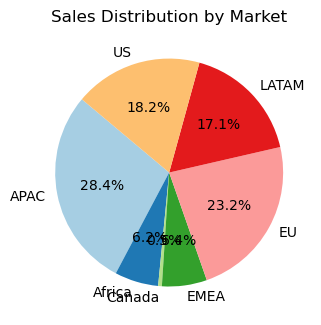

In [13]:
# Pie chart for sales by market
plt.subplot(1, 2, 2)
plt.pie(sales_by_market['Sales'], labels=sales_by_market['Market'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Market')

plt.tight_layout()
plt.show()

In [20]:
# Grouping sales by category and sub-category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
sales_by_sub_category = data.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

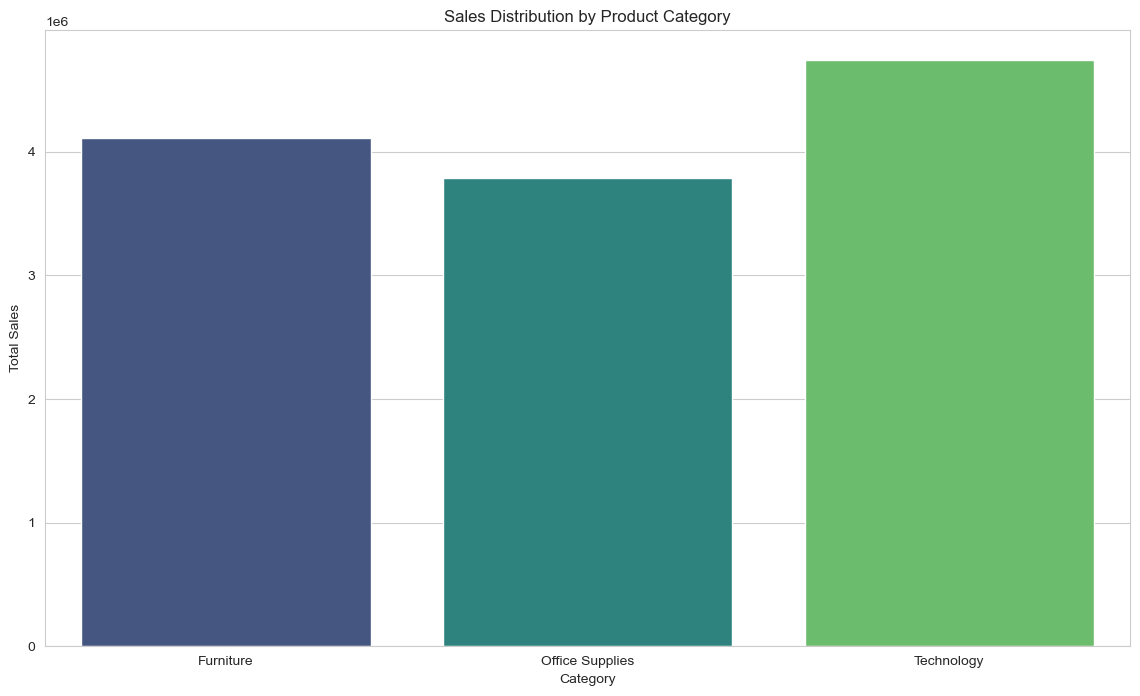

In [21]:
# Advanced bar plot for sales by category
plt.figure(figsize=(14, 8))
sns.barplot(data=sales_by_category, x='Category', y='Sales', palette='viridis')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


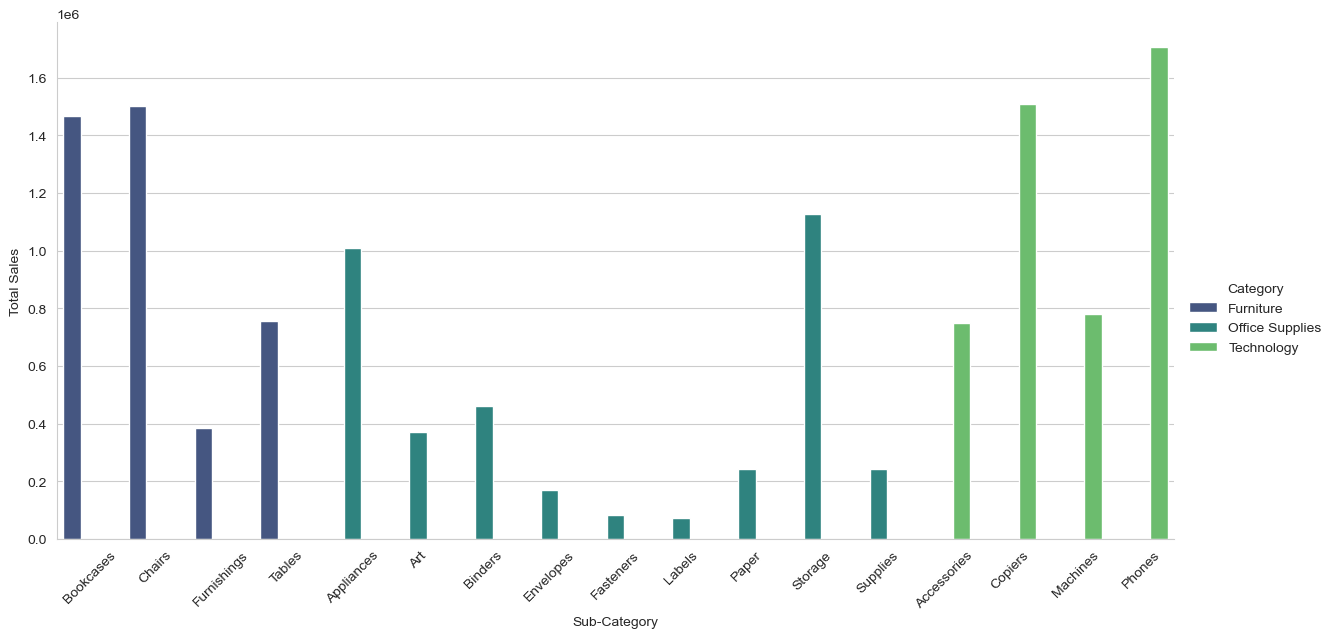

In [22]:
# Advanced bar plot for sales by sub-category within each category
g = sns.catplot(data=sales_by_sub_category, x='Sub-Category', y='Sales', hue='Category', kind='bar', height=6, aspect=2, palette='viridis')
g.set_xticklabels(rotation=45)
g.set_titles("Sales Distribution by Sub-Category")
g.set_axis_labels("Sub-Category", "Total Sales")
plt.show()

In [23]:
# Calculate monthly profit
monthly_profit = data.groupby(['Order Year', 'Order Month'])['Profit'].sum().reset_index()


In [24]:
# Pivot the data to have years as columns for a line plot
monthly_profit_pivot = monthly_profit.pivot(index='Order Month', columns='Order Year', values='Profit')

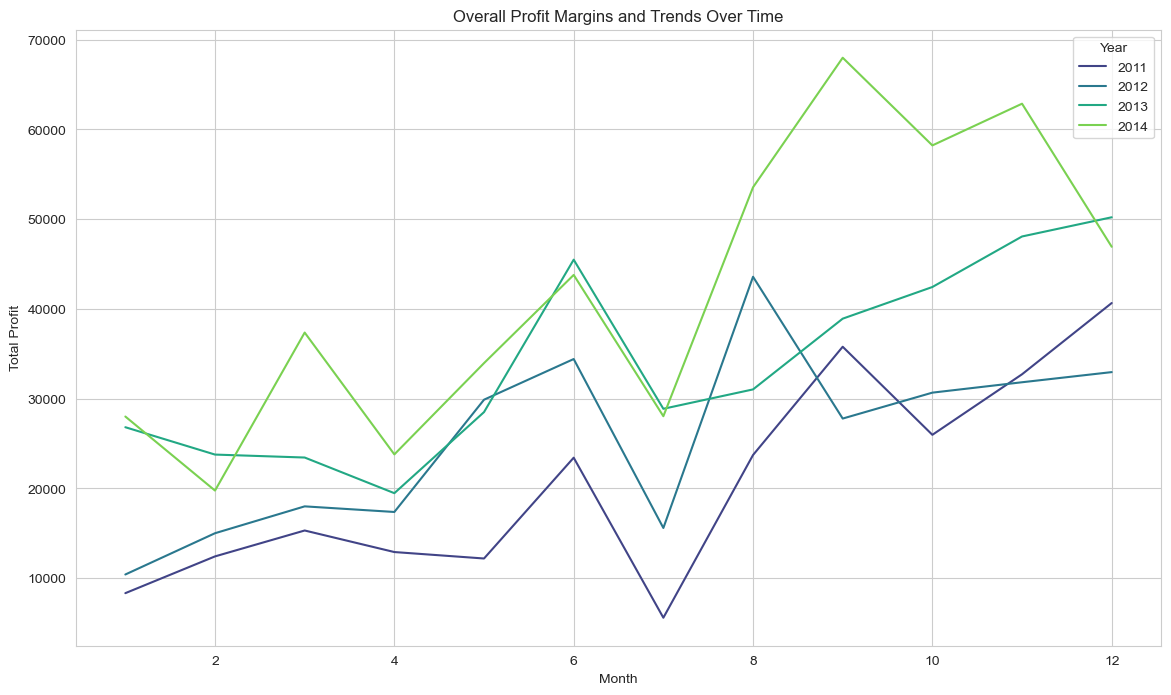

In [25]:
# Plotting overall profit margins and trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_profit_pivot, palette='viridis', dashes=False)
plt.title('Overall Profit Margins and Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend(title='Year')
plt.show()

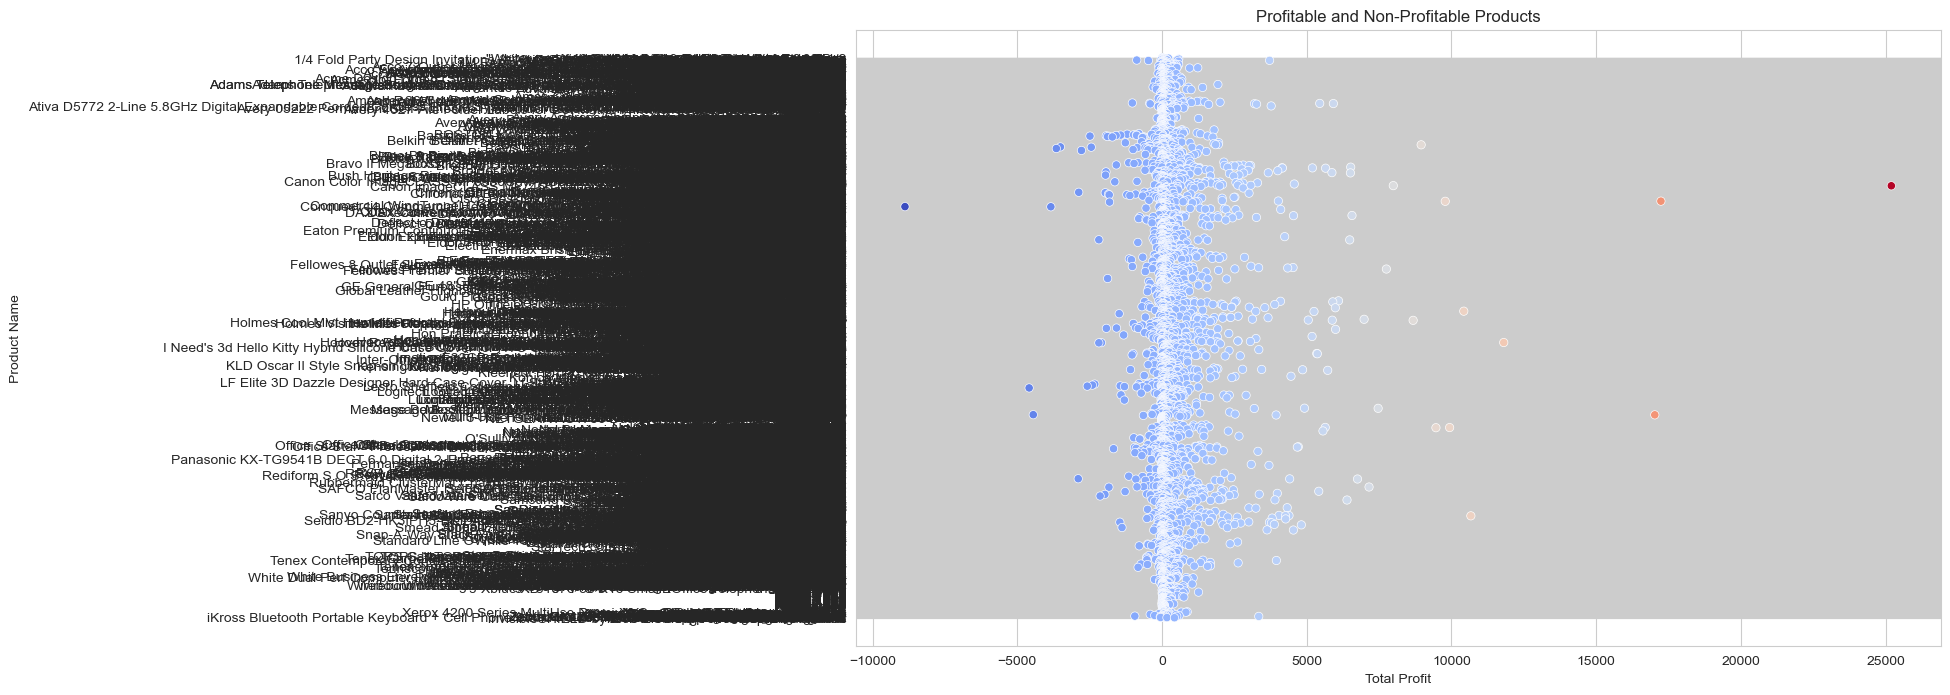

In [26]:
#Profitable and Non-Profitable Products
# Calculate total profit for each product
product_profit = data.groupby('Product Name')['Profit'].sum().reset_index()
# Sort by profit to identify most and least profitable products
most_profitable_products = product_profit.sort_values(by='Profit', ascending=False).head(10)
least_profitable_products = product_profit.sort_values(by='Profit', ascending=True).head(10)

# Scatter plot for profitable and non-profitable products
plt.figure(figsize=(14, 8))
sns.scatterplot(data=product_profit, x='Profit', y='Product Name', hue='Profit', palette='coolwarm', legend=False)
plt.title('Profitable and Non-Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

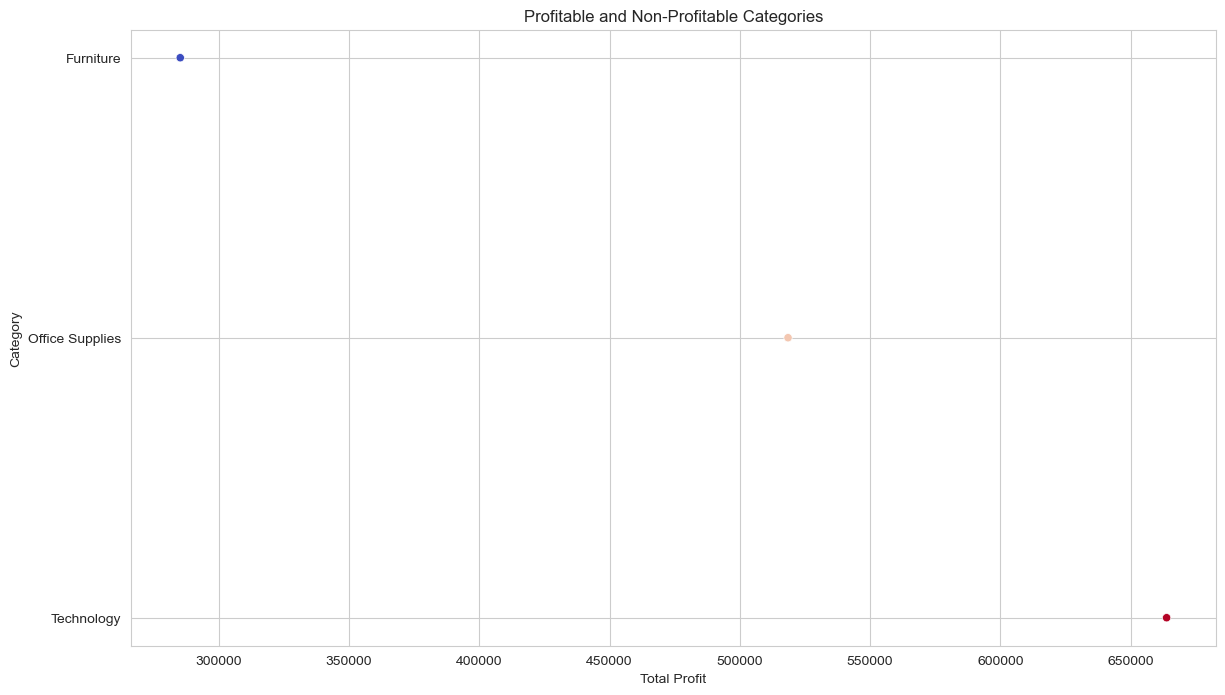

In [27]:
#Profitable and Non-Profitable Categories
# Calculate total profit for each category
category_profit = data.groupby('Category')['Profit'].sum().reset_index()

# Scatter plot for profitable and non-profitable categories
plt.figure(figsize=(14, 8))
sns.scatterplot(data=category_profit, x='Profit', y='Category', hue='Profit', palette='coolwarm', legend=False)
plt.title('Profitable and Non-Profitable Categories')
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.show()


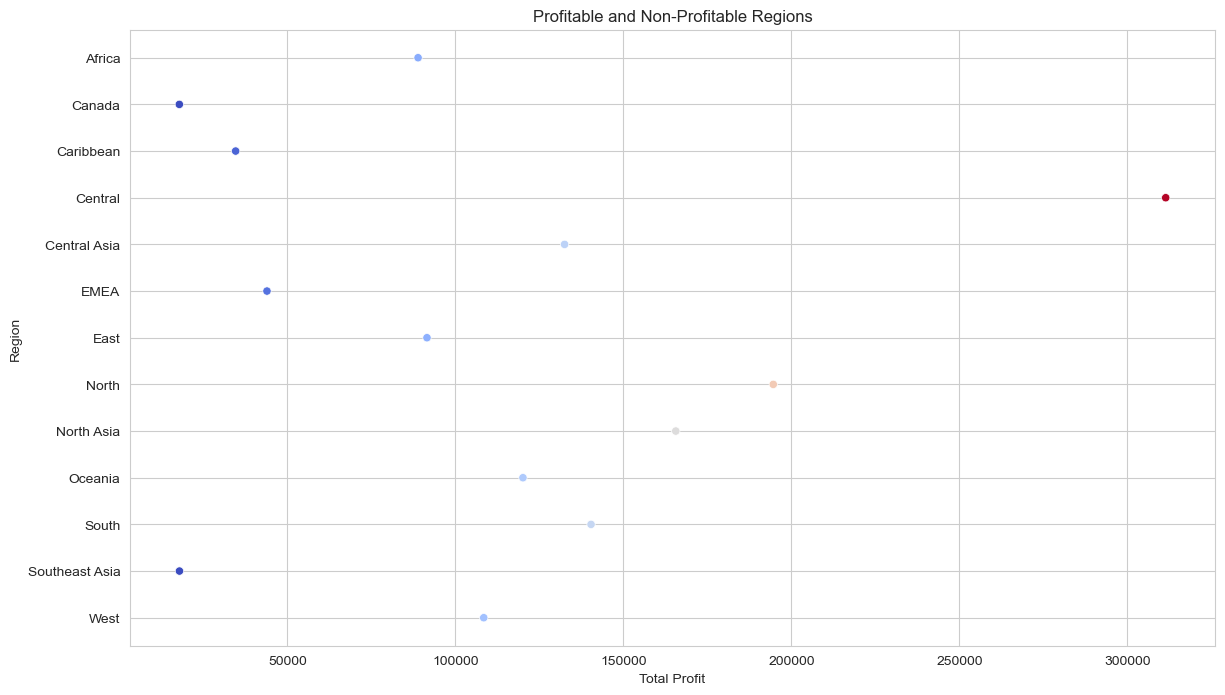

In [28]:
# Profitable and nonprofitable regions
#Calculate total profit for each region
region_profit = data.groupby('Region')['Profit'].sum().reset_index()

# Scatter plot for profitable and non-profitable regions
plt.figure(figsize=(14, 8))
sns.scatterplot(data=region_profit, x='Profit', y='Region', hue='Profit', palette='coolwarm', legend=False)
plt.title('Profitable and Non-Profitable Regions')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.show()


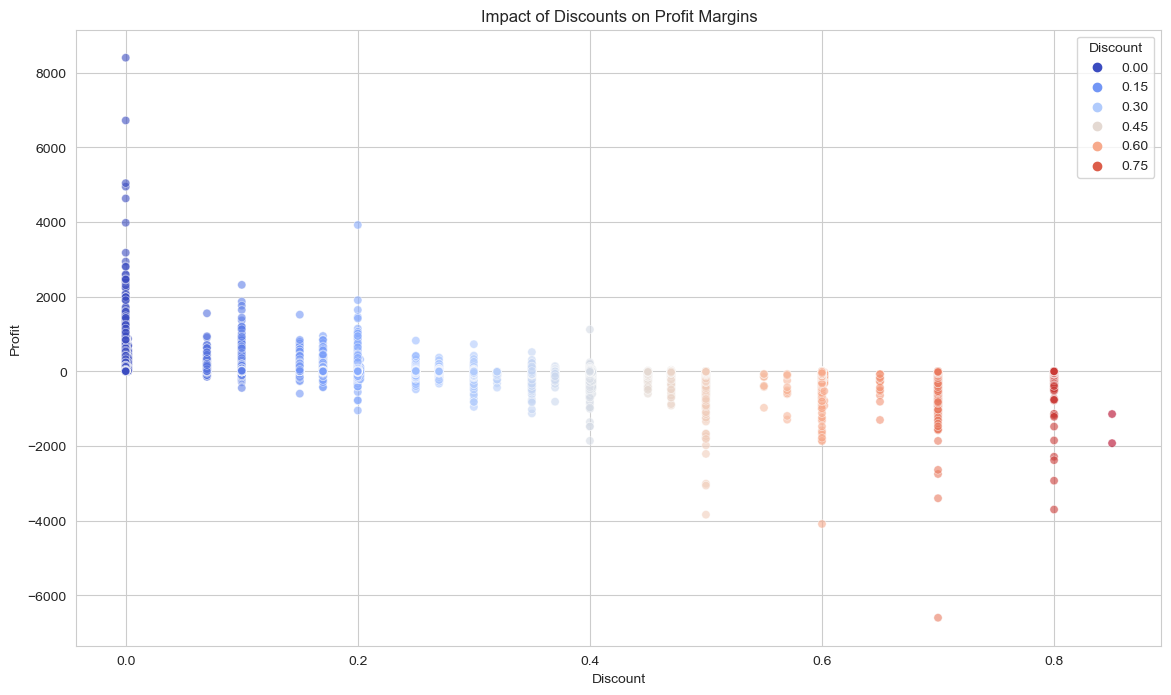

In [29]:
#Impact of Discounts on Profit Margins
# Scatter plot to show impact of discounts on profit margins
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Discount', y='Profit', hue='Discount', palette='coolwarm', alpha=0.6)
plt.title('Impact of Discounts on Profit Margins')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()



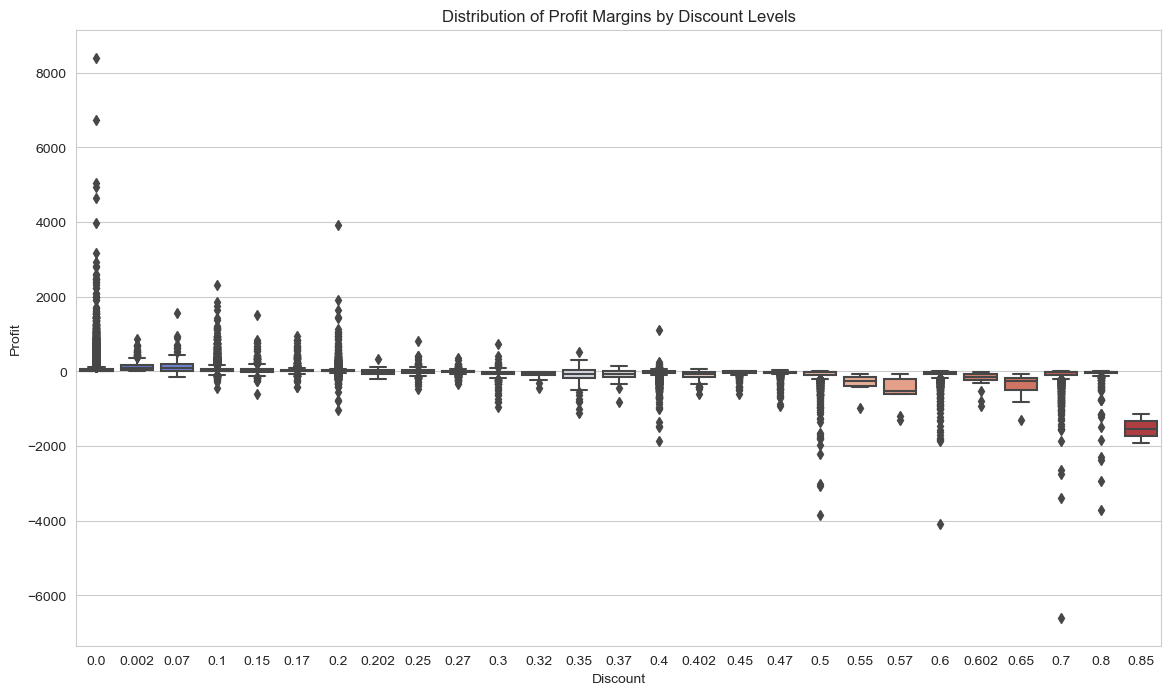

In [30]:

# Box plot to show distribution of profit margins by discount levels
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Discount', y='Profit', palette='coolwarm')
plt.title('Distribution of Profit Margins by Discount Levels')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

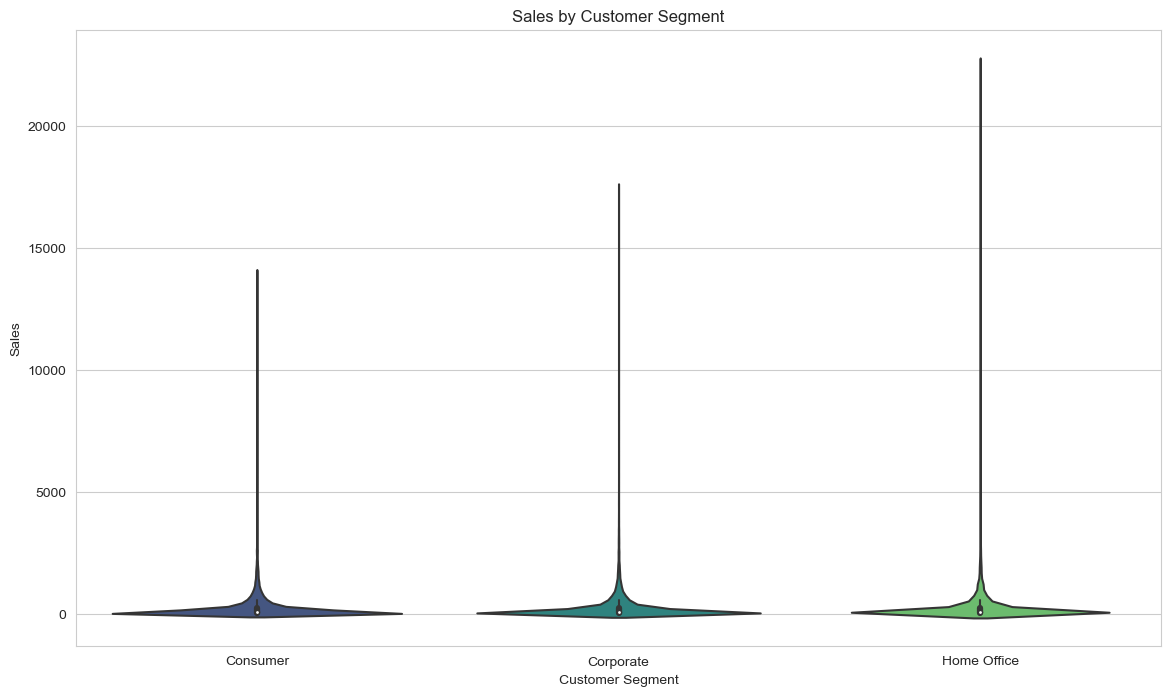

In [31]:
#Sales and Profit by Customer Segment using Violin Plot
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Violin plot for sales by customer segment
plt.figure(figsize=(14, 8))
sns.violinplot(data=data, x='Segment', y='Sales', palette='viridis')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

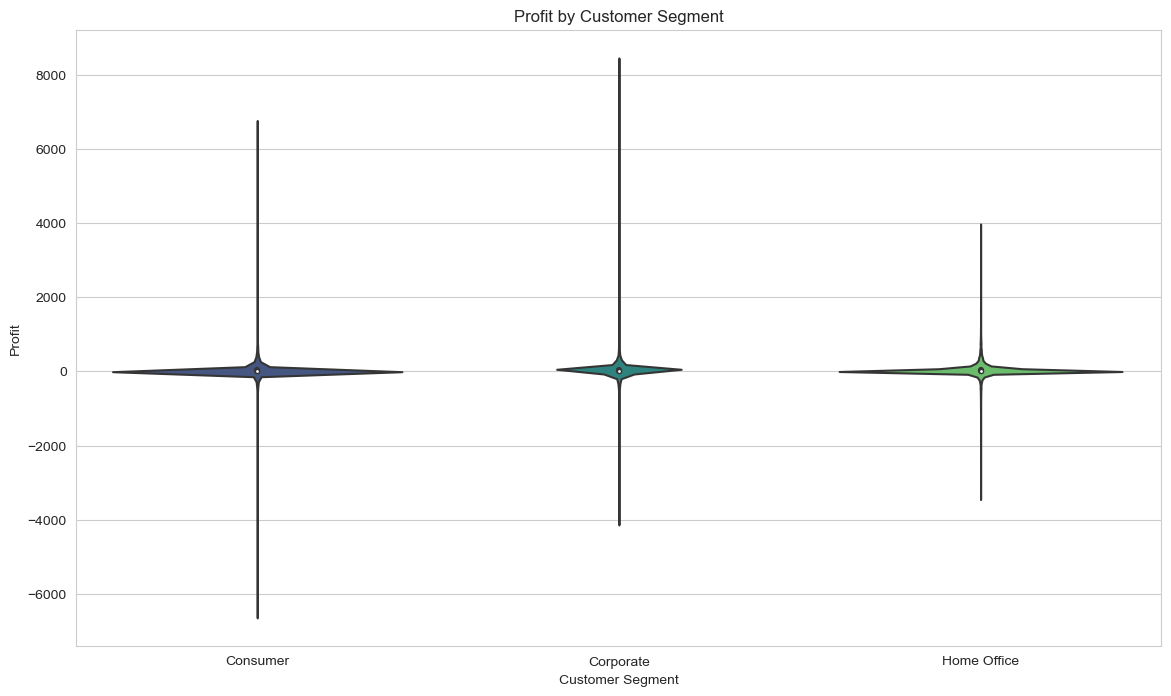

In [32]:
# Violin plot for profit by customer segment
plt.figure(figsize=(14, 8))
sns.violinplot(data=data, x='Segment', y='Profit', palette='viridis')
plt.title('Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Profit')
plt.show()

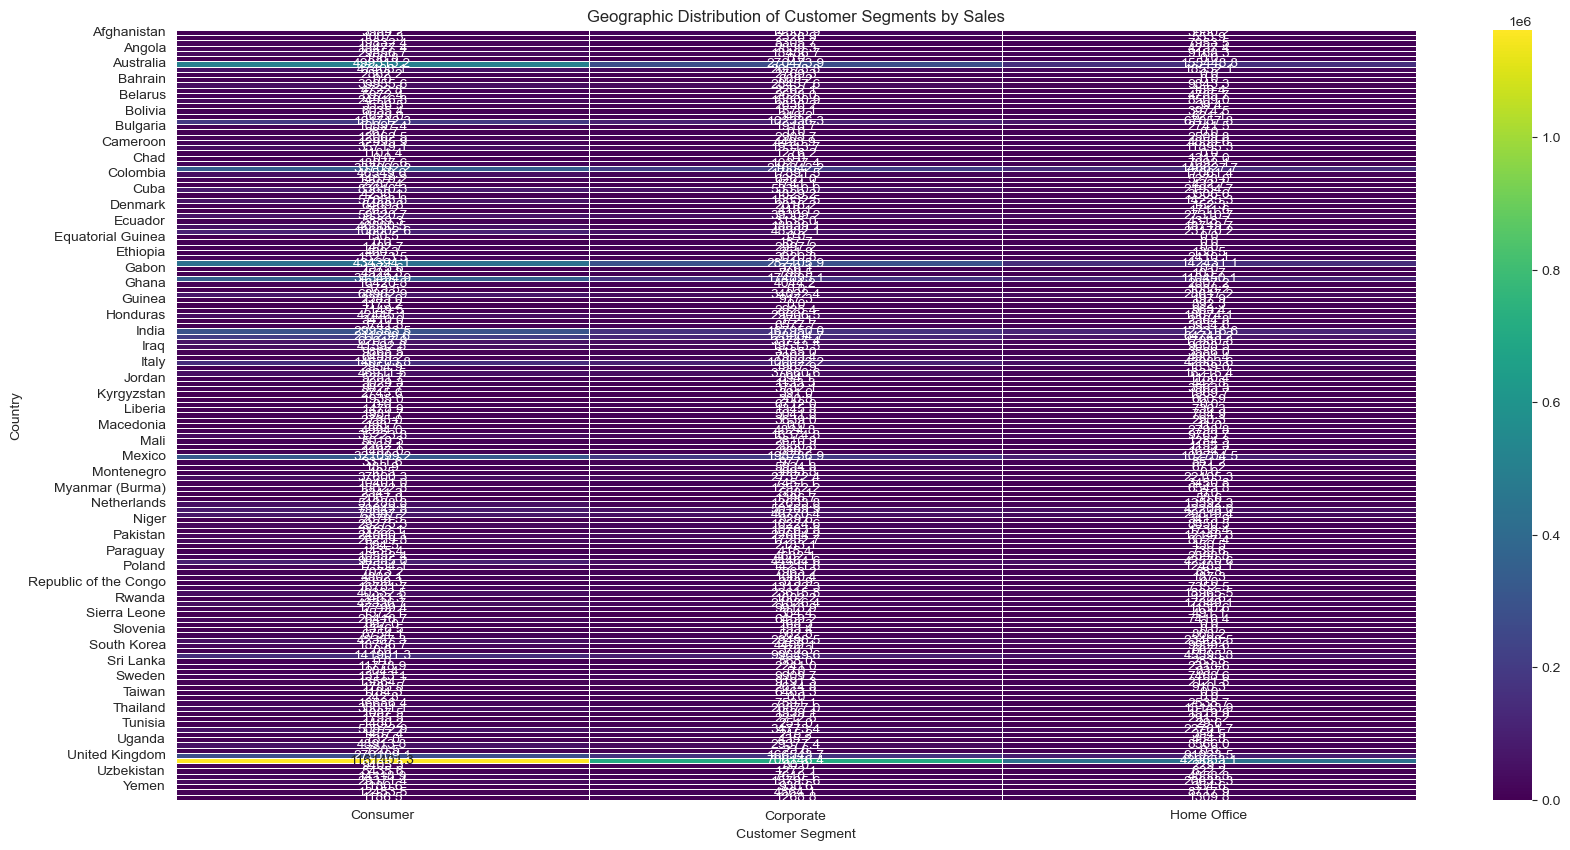

In [33]:
# Grouping data by country and segment to calculate total sales
geo_segment_sales = data.groupby(['Country', 'Segment'])['Sales'].sum().unstack().fillna(0)

# Plotting heatmap for geographic distribution of customer segments by sales
plt.figure(figsize=(20, 10))
sns.heatmap(geo_segment_sales, annot=True, fmt=".1f", cmap='viridis', linewidths=.5)
plt.title('Geographic Distribution of Customer Segments by Sales')
plt.xlabel('Customer Segment')
plt.ylabel('Country')
plt.show()

In [37]:
# Distribution of shipping modes
shipping_mode_distribution = data['Ship Mode'].value_counts()
print(shipping_mode_distribution)


Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64


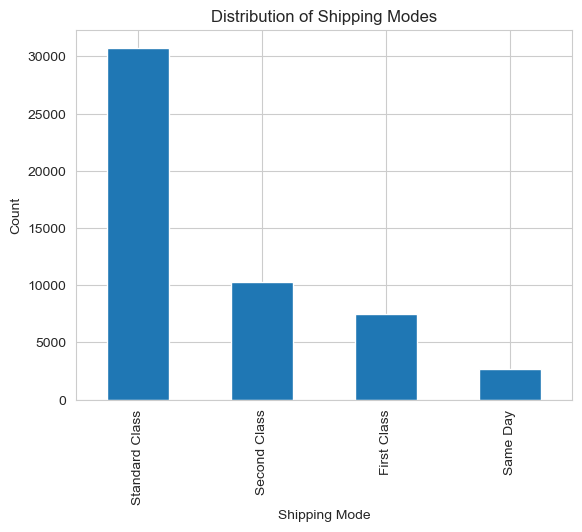

In [38]:
# Plot the distribution
shipping_mode_distribution.plot(kind='bar')
plt.title('Distribution of Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.show()

In [40]:
# Distribution of order priorities
order_priority_distribution = data['Order Priority'].value_counts()
print(order_priority_distribution)

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64


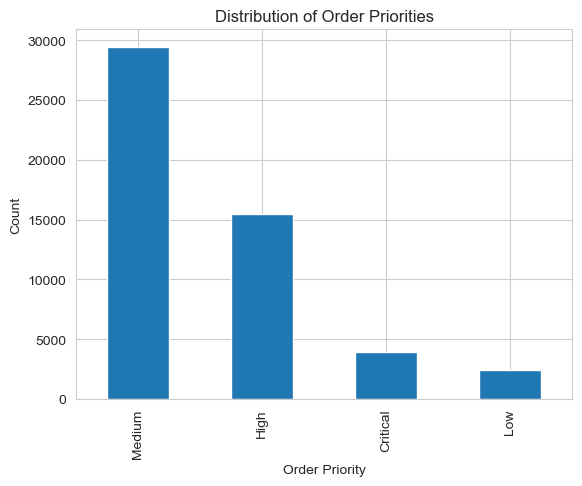

In [41]:

# Plot the distribution
order_priority_distribution.plot(kind='bar')
plt.title('Distribution of Order Priorities')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.show()


# Conclusions: 
Insightful Analysis of Sales and Profit Trends

1.Sustained growth in sales
Over the years, the company has experienced a steady increase in sales, peaking in 2014. This indicates a strong upward trajectory in revenue generation, suggesting effective sales strategies and market penetration.

2.Dominant Regions and Markets:
The Central region, particularly within the APAC market, has emerged as the top performer in sales. This highlights the region's robust demand and potential for continued growth, suggesting targeted efforts and successful market adaptation in APAC.

3.Technology Category's Stellar Performance:
Among all product categories, Technology stands out with the highest sales and profit margins. Within this category, phones have been the best-selling item, driven by a large user base. This underscores the importance of focusing on high-demand tech products to drive revenue.

4.Seasonal Sales and Profit Trends:
Despite overall growth, there are seasonal variations. July consistently underperforms across all years, whereas September 2014 marked the highest profit margins. This seasonal insight can guide promotional strategies and inventory planning.

5.Impact of Discounts on Profit Margins:
A clear relationship exists between discount levels and profit margins. Full-price sales yield higher margins compared to discounted sales. This insight can inform pricing strategies to maximize profitability while balancing customer acquisition.

6.Customer Segment Performance:
In the customer segments, Home Office records the highest sales but lacks significant profit. In contrast, the Corporate segment achieves the highest profit, indicating strong purchasing power and profitability. The Consumer segment experiences fluctuating performance, highlighting the need for targeted strategies to stabilize and enhance profit in this segment.

7.Shipping and Order Priority Insights:
Standard class shipping is the most utilized, indicating a preference for cost-effective shipping options among customers. Orders with medium priority are the most frequent, suggesting that while speed is important, there is a balanced approach to urgency and cost.


Recommendations:

Leverage Peak Performance in APAC:

Continue to strengthen market presence in the Central APAC region through targeted marketing and product offerings tailored to local preferences.

Focus on Technology Products:

Invest in the Technology category, especially high-demand items like phones, to capitalize on their profitability and large user base.

Address Seasonal Trends:

Implement targeted promotions in underperforming months like July to boost sales.
Prepare for high demand in profitable months like September with adequate inventory and strategic marketing.

Optimize Pricing Strategies:

Maintain a balance between offering discounts and maximizing profit margins. Consider value-based pricing for high-demand products.

Segment-Specific Strategies:

Develop specific strategies for Home Office to improve profitability.
Continue leveraging the Corporate segment's purchasing power.
Stabilize and grow the Consumer segment with tailored offers and loyalty programs.

Shipping and Order Priority:

Enhance the efficiency of Standard class shipping to maintain customer satisfaction while managing costs.
Evaluate the impact of order priority on customer satisfaction and adjust service levels accordingly.